# Tarea 4

## Selección de características

### Método de filtro

#### ANOVA de valor F

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy as np
from scipy.stats import spearmanr

In [2]:
from sklearn import datasets
import pandas as pd
 
diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

In [3]:
from sklearn.feature_selection import f_regression

In [5]:
y = df[['target']]
y

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [6]:
x = df[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']]
x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [7]:
f_value = f_regression(x, y)
f_value

C:\Users\alexi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([ 16.10137401,   0.81742349, 230.65376449, 106.52013086,
         20.71056745,  13.74607917,  81.23965868, 100.06926441,
        207.27119362,  75.3996832 ]),
 array([7.05568615e-05, 3.66429295e-01, 3.46600645e-42, 1.64937205e-22,
        6.92071179e-06, 2.35984810e-04, 6.16286470e-18, 2.30425328e-21,
        8.82645896e-39, 7.58008327e-17]))

In [8]:
pass_test = []
not_pass_test = []
alpha = 0.05
for i in range(len(f_value[1])):
    print(x.columns[i], f_value[1][i])
    if f_value[1][i] < alpha:
        pass_test.append(x.columns[i])
    else:
        not_pass_test.append(x.columns[i])

age 7.05568614911548e-05
sex 0.3664292946520661
bmi 3.466006445166797e-42
bp 1.6493720527425492e-22
s1 6.9207117877593694e-06
s2 0.00023598480959851294
s3 6.162864695183821e-18
s4 2.3042532817536976e-21
s5 8.826458958879996e-39
s6 7.580083266084248e-17


In [11]:
df_results = pd.DataFrame(f_value[0], index=x.columns)
df_results.columns = ['f_value']
df_results.sort_values('f_value', inplace = True, ascending = False)
df_results

,f_value
bmi,230.653764
s5,207.271194
bp,106.520131
s4,100.069264
s3,81.239659
s6,75.399683
s1,20.710567
age,16.101374
s2,13.746079
sex,0.817423


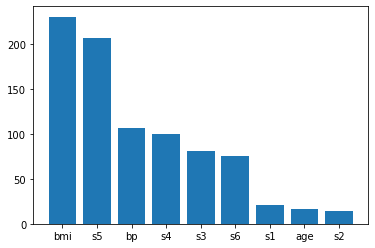

In [12]:
plt.figure()
plt.bar(df_results.drop(not_pass_test).index, df_results.drop(not_pass_test).f_value)
plt.show()

El BMI y s5 son las variables mas linealmente relacionadas con el target.

### Método de envoltura o wrapper

#### Selección de características exhaustiva

In [13]:
from sklearn.linear_model import LinearRegression

In [35]:
pip install mlxtend

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
Note: you may need to restart the kernel to use updated packages.


ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

scikit-learn 1.3.2 requires joblib>=1.1.1, but you'll have joblib 0.17.0 which is incompatible.


In [14]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [15]:
lr = LinearRegression()

efs = EFS(estimator = lr,
          min_features = 1,
          max_features = 10,
          scoring = 'neg_mean_absolute_error',
          cv = 5)

In [16]:
efs = efs.fit(x, y)

Features: 1023/1023

In [17]:
print('Best accuracy score: %.2f' % efs.best_score_)
print('Best subset (corresponding names):', efs.best_feature_names_)

Best accuracy score: -43.84
Best subset (corresponding names): ('sex', 'bmi', 'bp', 's1', 's2', 's4', 's5')


In [18]:
metric_dict = efs.get_metric_dict()
df_efs = pd.DataFrame(metric_dict).T
df_efs.sort_values('avg_score', ascending=False,  inplace = True)
df_efs_best_10 = df_efs.iloc[:10]
df_efs_best_10

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
934,"(1, 2, 3, 4, 5, 7, 8)","[-42.349248139451355, -44.592068243683684, -48...",-43.8432,"(sex, bmi, bp, s1, s2, s4, s5)",3.00191,2.33559,1.1678
1003,"(1, 2, 3, 4, 5, 6, 7, 8)","[-42.38517732193161, -44.573586694176484, -48....",-43.9025,"(sex, bmi, bp, s1, s2, s3, s4, s5)",3.04248,2.36716,1.18358
932,"(1, 2, 3, 4, 5, 6, 8)","[-42.40400746287435, -44.7938475155732, -48.23...",-43.9132,"(sex, bmi, bp, s1, s2, s3, s5)",3.09505,2.40805,1.20403
937,"(1, 2, 3, 4, 6, 7, 8)","[-42.570767270648815, -44.66250707387814, -47....",-43.9152,"(sex, bmi, bp, s1, s3, s4, s5)",2.72155,2.11746,1.05873
768,"(1, 2, 3, 4, 6, 8)","[-42.58022816518299, -44.848192379187466, -47....",-43.9256,"(sex, bmi, bp, s1, s3, s5)",2.7921,2.17235,1.08618
765,"(1, 2, 3, 4, 5, 8)","[-42.469724194302444, -44.83579448256897, -48....",-43.9279,"(sex, bmi, bp, s1, s2, s5)",3.10051,2.41231,1.20615
770,"(1, 2, 3, 4, 7, 8)","[-42.641602773905745, -44.6317518836414, -47.7...",-43.9463,"(sex, bmi, bp, s1, s4, s5)",2.69615,2.09769,1.04885
970,"(0, 1, 2, 3, 4, 5, 7, 8)","[-42.345861662710874, -44.7405892300449, -48.1...",-43.9521,"(age, sex, bmi, bp, s1, s2, s4, s5)",2.93773,2.28565,1.14283
774,"(1, 2, 3, 5, 6, 8)","[-42.69177277863824, -44.96614280573645, -47.7...",-43.9984,"(sex, bmi, bp, s2, s3, s5)",2.80009,2.17856,1.08928
1012,"(0, 1, 2, 3, 4, 5, 6, 7, 8)","[-42.38179260406828, -44.701432738838434, -48....",-44.0078,"(age, sex, bmi, bp, s1, s2, s3, s4, s5)",2.98055,2.31897,1.15948


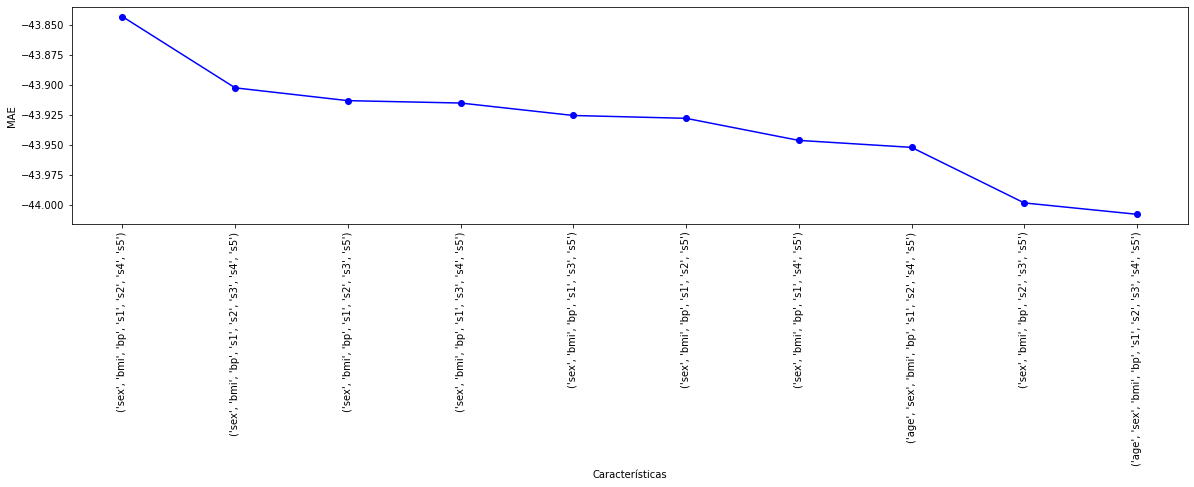

In [19]:
fig = plt.figure(figsize=(20, 4))

plt.plot(
    df_efs_best_10.feature_names.astype(str), 
    df_efs_best_10.avg_score, 
    color='blue', marker='o'
)
plt.ylabel('MAE')
plt.xlabel('Características')

plt.xticks(rotation = 90)

plt.show()

Las características elegidas a considerar son: <br>
sex: Gender of the patient<br>
bmi: Body mass index<br>
bp: Average blood pressure<br>
s1: Total serum cholesterol<br>
s2: Low-density lipoproteins<br>
s4: Total cholesterol<br>
s5: Possibly log of serum triglycerides level

Estas características fueron seleccionadas debido a los resultados mostrados tanto en la prueba de ANOVA de valor F y la Selección de características exhaustiva, mostrando el MAE más bajo dentro de todas las combinaciones posibles, además de ser variables comunmente utilizadas y probadas en métodos de regresión lineal dando resulados con mayor precisión.

#### Bibliografía

Shukla AK (2020) Patient diabetes forecasting based on machine learning approach. In: Pant M, Sharma TK, Arya R, Sahana BC, Zolfagharinia H (eds) Soft computing: theories and applications. Advances in intelligent systems and computing, vol 1154. Springer, Singapore